In [3]:
from sympy import *
from numpy import asarray
from numpy import arange
import matplotlib

from numpy.random import rand
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
!pip install ffmpeg

In [4]:
xs, ys, zs = symbols('x y z')

# Тестовые функции для оптимизации

**Функция Бута**

Формула:

Глобальный минимум:

Метод поиска:

In [5]:
class function_Buta():
    @staticmethod
    def func(x, y):
        return (x + 2 * y - 7) ** 2 + (2 * x + y - 5) **2
    
    @staticmethod
    def bounds():
        return np.array([[-10, -10], [10, 10]])
    
    @staticmethod
    def global_min():
        return np.array([[1.0, 3.0, 0.0]])
  
    @staticmethod
    def gradient(x,y):
        dz_x = 10*x + 8*y - 34
        dz_y = 8*x + 10*y - 38
        return np.array([dz_x, dz_y])

In [6]:
# print((function_Buta.gradient(0,0)))
# x,y = (function_Buta.gradient(1,2))
# print(x)
# print(y)

**Функция Химмельблау**

Формула:

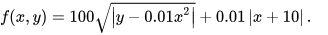

Глобальный минимум:

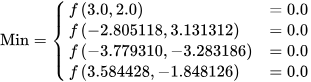


Метод поиска:

In [7]:
class Himm():
    @staticmethod
    def func(x, y):
        return (x * x + y - 11) ** 2 + (x + y * y - 7) ** 2
    
    @staticmethod
    def bounds():
        return np.array([[-5, -5], [5, 5]])
    
    @staticmethod
    def global_min():
        return np.array([[3, 2, 0.0],[-2.805118, 3.131312,0], [-3.779310, -3.283186,0], [3.584428, -1.848126,0]])
        
  
    @staticmethod
    def gradient(x,y):  
        dz_x = 4 * x * (x * x + y - 11) + 2 * (x + y * y - 7)
        dz_y = 4 * y * (y * y + x - 7) + 2 * (y + x * x - 11)
        return np.array([dz_x, dz_y])
    

     

In [8]:
print(Himm.global_min())

[[ 3.        2.        0.      ]
 [-2.805118  3.131312  0.      ]
 [-3.77931  -3.283186  0.      ]
 [ 3.584428 -1.848126  0.      ]]


In [9]:
def plot_function_and_trajectory_3D(history, function: callable, bounds: callable, global_minimum: callable):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x_range = np.linspace(bounds[0, 0], bounds[1, 0], 1000)
    y_range = np.linspace(bounds[0, 1], bounds[1, 1], 1000)
    X, Y = np.meshgrid(x_range, y_range)
    Z = function(X, Y)
    ax.scatter(history[0][0], history[0][1], history[0][2], c='blue', marker='o', s=50, label='Start Point')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    trajectory = np.array(history)
    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], c='red', label='Trajectory')
    if global_minimum is not None:
        for i in range(len(global_minimum)):
            ax.scatter(global_minimum[i][0], global_minimum[i][1], global_minimum[i][2], c='green', marker='*', s=100, label='Global Minimum')
    ax.view_init(azim=100, elev=30)
    ax.scatter(history[len(history)-1, 0], history[len(history)-1, 1], history[len(history)-1, 2], c='black', marker='+', s=50, label='Last Point')
    ax.legend()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Function and Trajectory')
    plt.show()

In [10]:
def plot_function_and_trajectory_2D(history, function: callable, bounds: callable, global_minimum: callable):
    fig, ax = plt.subplots()

    x_range = np.linspace(bounds[0, 0], bounds[1, 0], 1000)
    y_range = np.linspace(bounds[0, 1], bounds[1, 1], 1000)
    X, Y = np.meshgrid(x_range, y_range)
    Z = function(X, Y)

    ax.contour(X, Y, Z, cmap='viridis', levels=20)


    ax.scatter(history[0][0], history[0][1], c='blue', marker='o', s=50, label='Start Point')

    trajectory = np.array(history)
    ax.plot(trajectory[:, 0], trajectory[:, 1], c='red', label='Trajectory')

   
    ax.scatter(history[-1, 0], history[-1, 1], c='black', marker='+', s=50, label='Last Point')
    if global_minimum is not None:
        for i in range(len(global_minimum)):
            ax.scatter(global_minimum[i][0], global_minimum[i][1], c='green', marker='*', s=100, label='Global Minimum')

    ax.legend()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Function and Trajectory')
    plt.show()

## Градиентный спуск

In [11]:
def GD(
    function: callable , gradient: callable, start_params: np.ndarray, 
    max_iter: int = 1000, learningRate: float = 0.1, delta: float = 0.001
    ):
    params = start_params.copy()
    history = [np.array([params[0], params[1], function(params[0], params[1])])]

    for i in range(max_iter):
        grad = gradient(params[0], params[1])
        grad_x, grad_y = grad[0], grad[1]
        params[0] = params[0] - learningRate * grad_x
        params[1] = params[1] - learningRate * grad_y
        history.append(np.array([params[0], params[1], function(params[0], params[1])]))
    
    return np.array(history)

In [12]:
xar= np.random.uniform(function_Buta.bounds()[0], function_Buta.bounds()[1])
print(xar)

[-8.99112102  8.78104183]


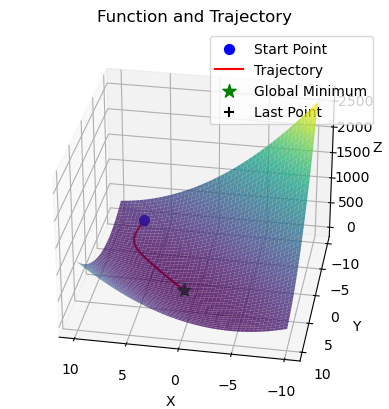

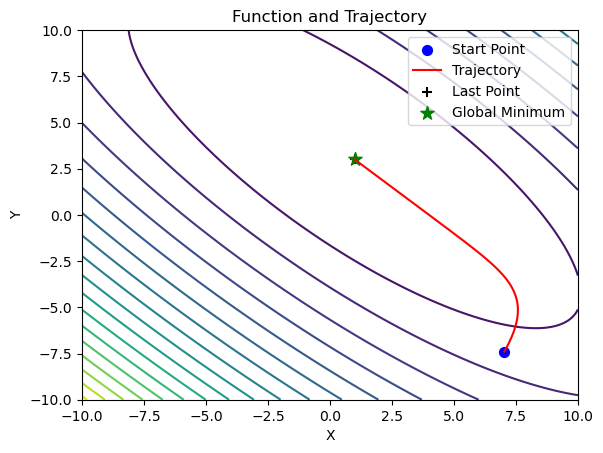

Глобальный минимум в точке(ах):
X = 1.0 Y = 3.0 Z = 0.0
Найденный минимум:
X = 1.0003545560838036 Y = 2.999645443916197 Z = 2.514200331243427e-07
Относительная ошибка: 0.00015856232097697764


In [13]:
history = GD(function_Buta.func, function_Buta.gradient, np.random.uniform(function_Buta.bounds()[0], function_Buta.bounds()[1]), max_iter = 1000, learningRate = 0.005)
plot_function_and_trajectory_3D(history, function_Buta.func, function_Buta.bounds(),function_Buta.global_min() )
plot_function_and_trajectory_2D(history, function_Buta.func, function_Buta.bounds(),function_Buta.global_min() )

glob = function_Buta.global_min()
# print((f"Глобальный минимум: {glob = function_Buta.global_min()}"))
print("Глобальный минимум в точке(ах):")
for i in range(len(glob)):
        print(f"X = {glob[i][0]} Y = {glob[i][1]} Z = {glob[i][2]}")
print(f"Найденный минимум:")
print(f"X = {history[len(history)-1, 0]} Y = {history[len(history)-1, 1]} Z = {history[len(history)-1, 2]}")


numerical_solution = np.array([history[len(history)-1, 0], history[len(history)-1, 1], history[len(history)-1, 2]])
analytical_solution = np.array([glob[i][0], glob[i][1], glob[i][2]])
error = np.linalg.norm(analytical_solution - numerical_solution) / np.linalg.norm(analytical_solution)
print(f"Относительная ошибка: {error}")

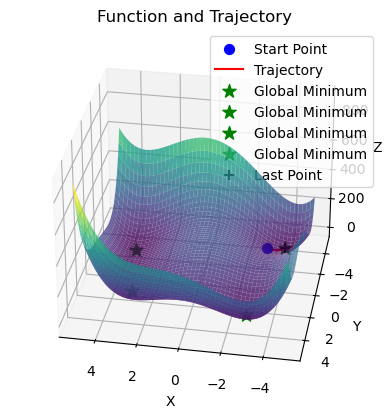

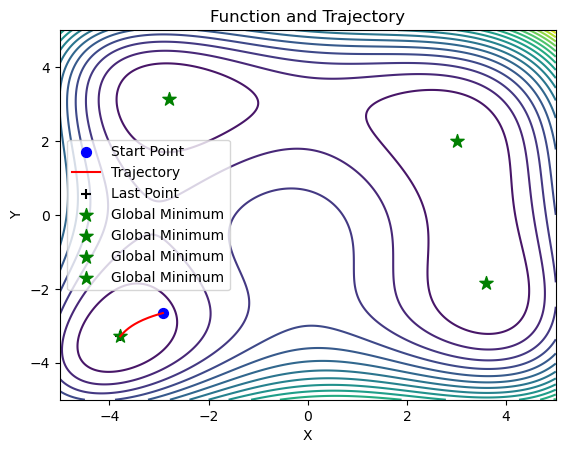

Глобальный минимум в точке(ах):
X = 3.0 Y = 2.0 Z = 0.0
X = -2.805118 Y = 3.131312 Z = 0.0
X = -3.77931 Y = -3.283186 Z = 0.0
X = 3.584428 Y = -1.848126 Z = 0.0
Найденный минимум:
X = -3.7793102533777447 Y = -3.2831859912861665 Z = 4.5753932502818685e-28
Относительная ошибка: 5.0642249906927356e-08


In [14]:
history = GD(Himm.func, Himm.gradient, np.random.uniform(Himm.bounds()[0], Himm.bounds()[1]), max_iter = 10000, learningRate = 0.001)
plot_function_and_trajectory_3D(history, Himm.func, Himm.bounds(), Himm.global_min())
plot_function_and_trajectory_2D(history, Himm.func, Himm.bounds(), Himm.global_min())

glob = Himm.global_min()
print("Глобальный минимум в точке(ах):")
for i in range(len(glob)):
        print(f"X = {glob[i][0]} Y = {glob[i][1]} Z = {glob[i][2]}")
        
print(f"Найденный минимум:")
print(f"X = {history[len(history)-1, 0]} Y = {history[len(history)-1, 1]} Z = {history[len(history)-1, 2]}")

for i in range(len(glob)):
    if (sqrt((history[len(history)-1, 0] - glob[i][0]) ** 2 + ((history[len(history)-1, 1] - glob[i][1]) ** 2) + (history[len(history)-1, 2] - glob[i][2]) ** 2)) < 0.01:
        analytical_solution = np.array([glob[i][0], glob[i][1], glob[i][2]])
    
numerical_solution = np.array([history[len(history)-1, 0], history[len(history)-1, 1], history[len(history)-1, 2]])

error = np.linalg.norm(analytical_solution - numerical_solution) / np.linalg.norm(analytical_solution)
print(f"Относительная ошибка: {error}")

## Градиентный спуск с моментной модификацией

In [17]:
def Momentum_GD(
    function: callable , gradient: callable, start_params: np.ndarray, glob_min: np.ndarray, 
    max_iter: int = 1000, learningRate: float = 0.1, delta: float = 0.001, momentum = 0.0000001
    ):
    params = start_params.copy()
    history = [np.array([params[0], params[1], function(params[0],params[1])])]
    
    vx, vy = 0, 0 
    for i in range(max_iter):
        grad = gradient(params[0], params[1])
        grad_x, grad_y = grad[0], grad[1]
        
        vx = momentum * vx - learningRate * grad_x
        vy = momentum * vy - learningRate * grad_y
        params[0] = params[0] + vx
        params[1] = params[1] + vy
        history.append(np.array([params[0], params[1], function(params[0], params[1])]))
    
    return np.array(history)

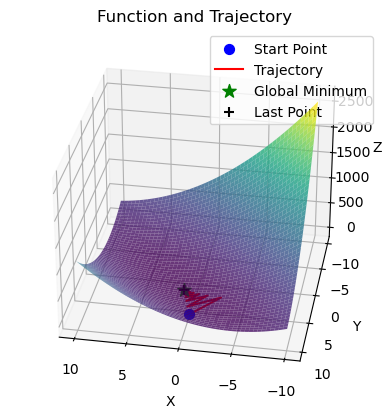

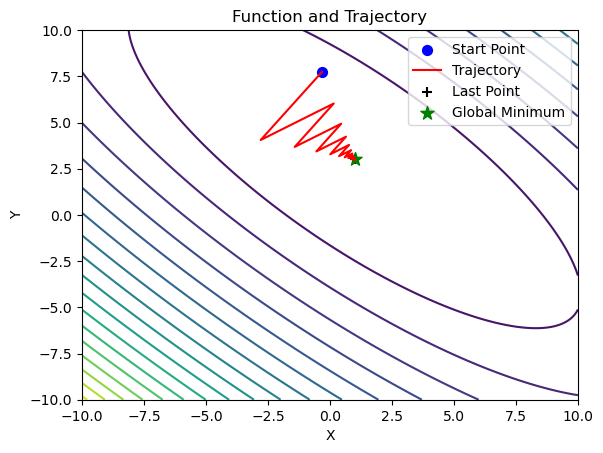

Глобальный минимум в точке(ах):
X = 1.0 Y = 3.0 Z = 0.0
Найденный минимум:
X = 0.9999999996654637 Y = 3.000000000861804 Z = 1.966666235556666e-18
Относительная ошибка: 2.923389463959103e-10


In [18]:
history = Momentum_GD(function_Buta.func, function_Buta.gradient, np.random.uniform(function_Buta.bounds()[0], function_Buta.bounds()[1]), function_Buta.global_min(), max_iter = 100, momentum = 0.001)
plot_function_and_trajectory_3D(history, function_Buta.func, function_Buta.bounds(),function_Buta.global_min() )
plot_function_and_trajectory_2D(history, function_Buta.func, function_Buta.bounds(),function_Buta.global_min() )

glob = function_Buta.global_min()
# print((f"Глобальный минимум: {glob = function_Buta.global_min()}"))
print("Глобальный минимум в точке(ах):")
for i in range(len(glob)):
        print(f"X = {glob[i][0]} Y = {glob[i][1]} Z = {glob[i][2]}")
print(f"Найденный минимум:")
print(f"X = {history[len(history)-1, 0]} Y = {history[len(history)-1, 1]} Z = {history[len(history)-1, 2]}")


numerical_solution = np.array([history[len(history)-1, 0], history[len(history)-1, 1], history[len(history)-1, 2]])
analytical_solution = np.array([glob[i][0], glob[i][1], glob[i][2]])
error = np.linalg.norm(analytical_solution - numerical_solution) / np.linalg.norm(analytical_solution)
print(f"Относительная ошибка: {error}")

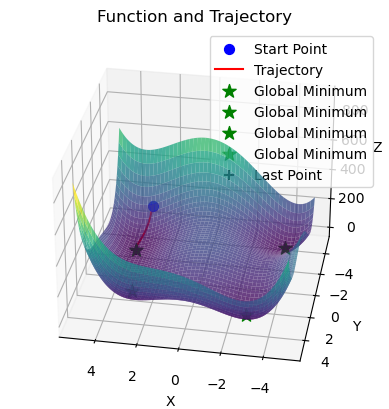

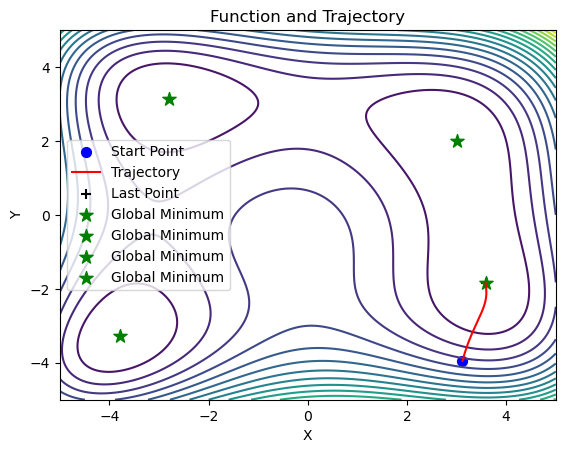

Глобальный минимум в точке(ах):
X = 3.0 Y = 2.0 Z = 0.0
X = -2.805118 Y = 3.131312 Z = 0.0
X = -3.77931 Y = -3.283186 Z = 0.0
X = 3.584428 Y = -1.848126 Z = 0.0
Найденный минимум:
X = 3.584428340330494 Y = -1.8481265269644078 Z = 4.291403324402304e-28
Относительная ошибка: 1.555506342835572e-07


In [19]:
history = Momentum_GD(Himm.func, Himm.gradient, np.random.uniform(Himm.bounds()[0], Himm.bounds()[1]), Himm.global_min(), max_iter = 10000, learningRate = 0.001)
plot_function_and_trajectory_3D(history, Himm.func, Himm.bounds(),Himm.global_min() )
plot_function_and_trajectory_2D(history, Himm.func, Himm.bounds(),Himm.global_min() )


glob = Himm.global_min()
print("Глобальный минимум в точке(ах):")
for i in range(len(glob)):
        print(f"X = {glob[i][0]} Y = {glob[i][1]} Z = {glob[i][2]}")
        
print(f"Найденный минимум:")
print(f"X = {history[len(history)-1, 0]} Y = {history[len(history)-1, 1]} Z = {history[len(history)-1, 2]}")

for i in range(len(glob)):
    if (sqrt((history[len(history)-1, 0] - glob[i][0]) ** 2 + ((history[len(history)-1, 1] - glob[i][1]) ** 2) + (history[len(history)-1, 2] - glob[i][2]) ** 2)) < 0.01:
        analytical_solution = np.array([glob[i][0], glob[i][1], glob[i][2]])
    
numerical_solution = np.array([history[len(history)-1, 0], history[len(history)-1, 1], history[len(history)-1, 2]])

error = np.linalg.norm(analytical_solution - numerical_solution) / np.linalg.norm(analytical_solution)
print(f"Относительная ошибка: {error}")

## Градиентный спуск с адаптивной модификацией

In [20]:
def Adagrad_GD(
    function: callable , gradient: callable, start_params: np.ndarray, glob_min: np.ndarray, 
    max_iter: int = 1000, learningRate: float = 0.01, delta: float = 0.001, eps: float = 0.0000001
    ):
    params = start_params.copy()
    history = [np.array([params[0], params[1], function(params[0],params[1])])]
    
    Gx, Gy = 0, 0
    for i in range(max_iter):
        grad = gradient(params[0], params[1])
        grad_x, grad_y = grad[0], grad[1]
        Gx = Gx + grad_x ** 2
        Gy = Gy + grad_y ** 2
        params[0] = params[0] - learningRate / ((Gx + eps) ** 0.5) * grad_x
        params[1] = params[1] - learningRate / ((Gy + eps) ** 0.5) * grad_y
        history.append(np.array([params[0], params[1], function(params[0], params[1])]))
    return np.array(history)

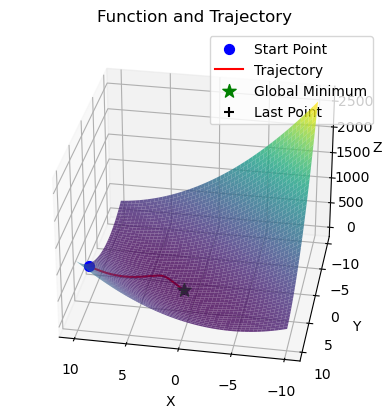

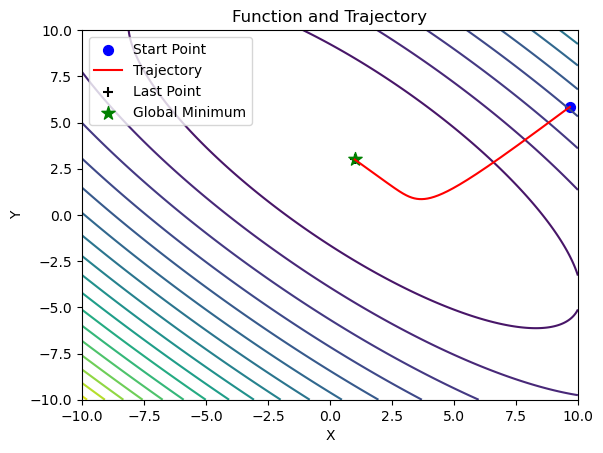

Глобальный минимум в точке(ах):
X = 1.0 Y = 3.0 Z = 0.0
Найденный минимум:
X = 1.000113648737067 Y = 2.999890044265714 Z = 2.506085201747893e-08
Относительная ошибка: 5.000629917056055e-05


In [21]:
history = Adagrad_GD(function_Buta.func, function_Buta.gradient, np.random.uniform(function_Buta.bounds()[0], function_Buta.bounds()[1]), function_Buta.global_min(), max_iter = 10000, learningRate = 0.3)
plot_function_and_trajectory_3D(history, function_Buta.func, function_Buta.bounds(),function_Buta.global_min() )
plot_function_and_trajectory_2D(history, function_Buta.func, function_Buta.bounds(),function_Buta.global_min() )

glob = function_Buta.global_min()
# print((f"Глобальный минимум: {glob = function_Buta.global_min()}"))
print("Глобальный минимум в точке(ах):")
for i in range(len(glob)):
        print(f"X = {glob[i][0]} Y = {glob[i][1]} Z = {glob[i][2]}")
print(f"Найденный минимум:")
print(f"X = {history[len(history)-1, 0]} Y = {history[len(history)-1, 1]} Z = {history[len(history)-1, 2]}")


numerical_solution = np.array([history[len(history)-1, 0], history[len(history)-1, 1], history[len(history)-1, 2]])
analytical_solution = np.array([glob[i][0], glob[i][1], glob[i][2]])
error = np.linalg.norm(analytical_solution - numerical_solution) / np.linalg.norm(analytical_solution)
print(f"Относительная ошибка: {error}")

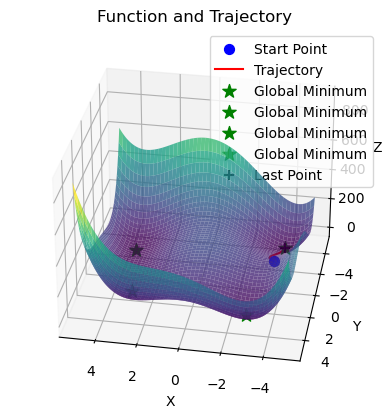

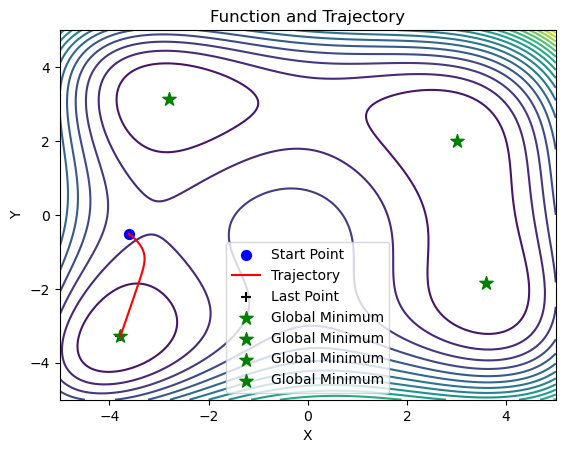

Глобальный минимум в точке(ах):
X = 3.0 Y = 2.0 Z = 0.0
X = -2.805118 Y = 3.131312 Z = 0.0
X = -3.77931 Y = -3.283186 Z = 0.0
X = 3.584428 Y = -1.848126 Z = 0.0
Найденный минимум:
X = -3.7793102533777345 Y = -3.283185991286129 Z = 6.601898029704126e-26
Относительная ошибка: 5.064224812397852e-08


In [22]:
history = Adagrad_GD(Himm.func, Himm.gradient, np.random.uniform(Himm.bounds()[0], Himm.bounds()[1]), Himm.global_min(), max_iter = 10000, learningRate = 0.06)
plot_function_and_trajectory_3D(history, Himm.func, Himm.bounds(), Himm.global_min() )
plot_function_and_trajectory_2D(history, Himm.func, Himm.bounds(), Himm.global_min() )


glob = Himm.global_min()
print("Глобальный минимум в точке(ах):")
for i in range(len(glob)):
        print(f"X = {glob[i][0]} Y = {glob[i][1]} Z = {glob[i][2]}")
        
print(f"Найденный минимум:")
print(f"X = {history[len(history)-1, 0]} Y = {history[len(history)-1, 1]} Z = {history[len(history)-1, 2]}")

for i in range(len(glob)):
    if (sqrt((history[len(history)-1, 0] - glob[i][0]) ** 2 + ((history[len(history)-1, 1] - glob[i][1]) ** 2) + (history[len(history)-1, 2] - glob[i][2]) ** 2)) < 0.01:
        analytical_solution = np.array([glob[i][0], glob[i][1], glob[i][2]])
    
numerical_solution = np.array([history[len(history)-1, 0], history[len(history)-1, 1], history[len(history)-1, 2]])

error = np.linalg.norm(analytical_solution - numerical_solution) / np.linalg.norm(analytical_solution)
print(f"Относительная ошибка: {error}")

## ADAptive Momentum

In [23]:
def ADAM_GD(
    function: callable , gradient: callable, start_params: np.ndarray, glob_min: np.ndarray, 
    max_iter: int = 1000, learningRate: float = 0.01, delta: float = 0.001, eps: float = 0.0000001, beta1: float = 0.9, beta2: float = 0.99
    ):
    params = start_params.copy()
    history = [np.array([params[0], params[1], function(params[0],params[1])])]
    
    Gx, Gy = 0, 0
    vx, vy = 0, 0

    for i in range(max_iter):
        grad = gradient(params[0], params[1])
        grad_x, grad_y = grad[0], grad[1]
        vx = beta1 * vx + (1 - beta1) * grad_x
        vy = beta1 * vy + (1 - beta1) * grad_y
        Gx = beta2 * Gx + (1 - beta2) * grad_x ** 2
        Gy = beta2 * Gy + (1 - beta2) * grad_y ** 2
        params[0] = params[0] - learningRate / ((Gx + eps) ** 0.5) * vx
        params[1] = params[1] - learningRate / ((Gy + eps) ** 0.5) * vy
        history.append(np.array([params[0], params[1], function(params[0], params[1])]))
    return np.array(history)

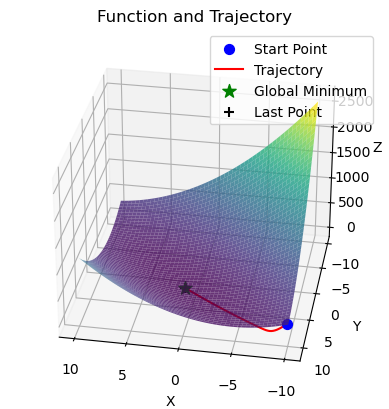

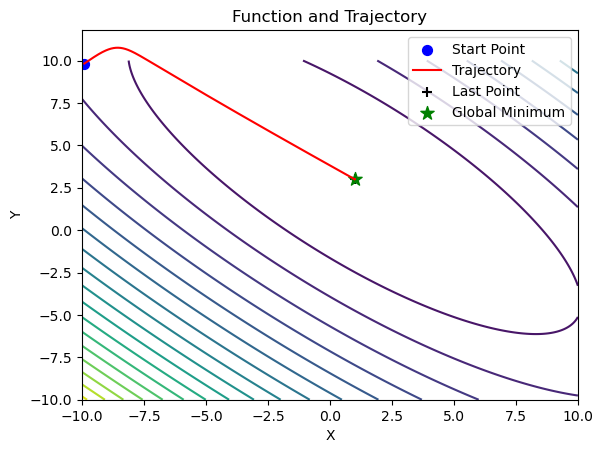

Глобальный минимум в точке(ах):
X = 1.0 Y = 3.0 Z = 0.0
Найденный минимум:
X = 0.9999648788015709 Y = 2.999964878801572 Z = 2.2202974423142325e-08
Относительная ошибка: 1.5706678996843978e-05


In [24]:
history = ADAM_GD(function_Buta.func, function_Buta.gradient, np.random.uniform(function_Buta.bounds()[0], function_Buta.bounds()[1]), function_Buta.global_min(), max_iter = 10000, learningRate = 0.01)
plot_function_and_trajectory_3D(history, function_Buta.func, function_Buta.bounds(),function_Buta.global_min() )
plot_function_and_trajectory_2D(history, function_Buta.func, function_Buta.bounds(),function_Buta.global_min() )


glob = function_Buta.global_min()
# print((f"Глобальный минимум: {glob = function_Buta.global_min()}"))
print("Глобальный минимум в точке(ах):")
for i in range(len(glob)):
        print(f"X = {glob[i][0]} Y = {glob[i][1]} Z = {glob[i][2]}")
print(f"Найденный минимум:")
print(f"X = {history[len(history)-1, 0]} Y = {history[len(history)-1, 1]} Z = {history[len(history)-1, 2]}")


numerical_solution = np.array([history[len(history)-1, 0], history[len(history)-1, 1], history[len(history)-1, 2]])
analytical_solution = np.array([glob[i][0], glob[i][1], glob[i][2]])
error = np.linalg.norm(analytical_solution - numerical_solution) / np.linalg.norm(analytical_solution)
print(f"Относительная ошибка: {error}")

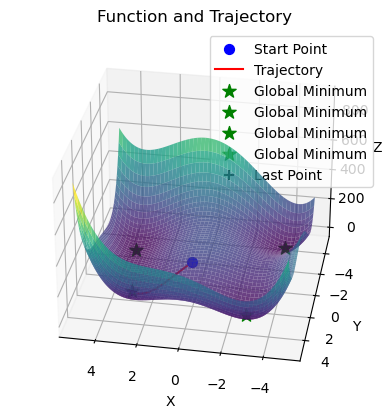

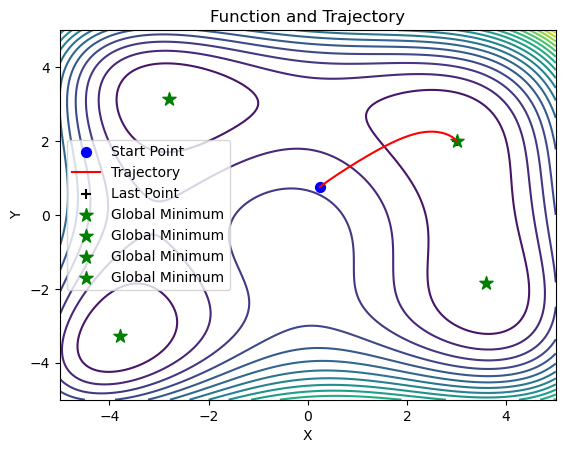

Глобальный минимум в точке(ах):
X = 3.0 Y = 2.0 Z = 0.0
X = -2.805118 Y = 3.131312 Z = 0.0
X = -3.77931 Y = -3.283186 Z = 0.0
X = 3.584428 Y = -1.848126 Z = 0.0
Найденный минимум:
X = 2.9999999999999774 Y = 2.0000000000000315 Z = 2.122982468130787e-26
Относительная ошибка: 1.0767182187714749e-14


In [25]:
history = Adagrad_GD(Himm.func, Himm.gradient, np.random.uniform(Himm.bounds()[0], Himm.bounds()[1]), Himm.global_min(), max_iter = 10000, learningRate = 0.1)
plot_function_and_trajectory_3D(history, Himm.func, Himm.bounds(),Himm.global_min() )
plot_function_and_trajectory_2D(history, Himm.func, Himm.bounds(),Himm.global_min() )


glob = Himm.global_min()
print("Глобальный минимум в точке(ах):")
for i in range(len(glob)):
        print(f"X = {glob[i][0]} Y = {glob[i][1]} Z = {glob[i][2]}")
        
print(f"Найденный минимум:")
print(f"X = {history[len(history)-1, 0]} Y = {history[len(history)-1, 1]} Z = {history[len(history)-1, 2]}")

for i in range(len(glob)):
    if (sqrt((history[len(history)-1, 0] - glob[i][0]) ** 2 + ((history[len(history)-1, 1] - glob[i][1]) ** 2) + (history[len(history)-1, 2] - glob[i][2]) ** 2)) < 0.01:
        analytical_solution = np.array([glob[i][0], glob[i][1], glob[i][2]])
    
numerical_solution = np.array([history[len(history)-1, 0], history[len(history)-1, 1], history[len(history)-1, 2]])

error = np.linalg.norm(analytical_solution - numerical_solution) / np.linalg.norm(analytical_solution)
print(f"Относительная ошибка: {error}")

# Символьное вычисление градиента

In [38]:
class CustomFunction:
    
    def __init__(self, expression, variables, bounds):
        self.expression = sympify(expression)
        self.variables = variables
        self.gradient = [diff(self.expression, var) for var in self.variables]
        self.lambdified_expression = lambdify(self.variables, self.expression, 'numpy')
        self.bounds = np.array(bounds)
        
        

    def evaluate(self, x, y):
        # print(f"выражение равно self.expression.subs ")
        # print(self.expression.subs({self.variables[0]: x, self.variables[1]: y}).evalf())
        return self.expression.subs({self.variables[0]: x, self.variables[1]: y}).evalf()

    def evaluate_gradient(self, x, y):
        return [grad.subs({self.variables[0]: x, self.variables[1]: y}).evalf() for grad in self.gradient]
    
    def calculate_values(self, x_array, y_array):
        return self.lambdified_expression(x_array, y_array)
    
    @staticmethod
    def bounds():
        return self.bounds
    
    @staticmethod
    def global_min():
        return None
   
        
        

In [39]:
xs, ys = symbols('x y')
print("Введите собcтвенную трехмерную функцию. Например (x + 2 * y - 7)**2 + (2 * x + y - 5)**2")
func_user = input()
variables = [xs, ys]



Введите собcтвенную трехмерную функцию. Например (x + 2 * y - 7)**2 + (2 * x + y - 5)**2


 (x + 2 * y - 7)**2 + (2 * x + y - 5)**2


In [29]:
print(f"Введите левую границу по оси X")
X_l = int(input())
print(f"Введите правую границу по оси X")
X_r = int(input())
print(f"Введите левую границу по оси Y")
Y_l = int(input())
print(f"Введите правую границу по оси Y")
Y_r = int(input())

Введите левую границу по оси X


 -20


Введите правую границу по оси X


 20


Введите левую границу по оси Y


 -20


Введите правую границу по оси Y


 20


In [40]:
custom_function = CustomFunction(func_user, variables, ([X_l, Y_l], [X_r, Y_r]))
start_params = np.random.uniform([X_l, Y_l], [X_r, Y_r])
print(start_params)

[  4.09882613 -14.16179701]


In [41]:
def calculate_values(custom_function, x_array, y_array):
    z_values = np.zeros((len(x_array), len(y_array)))

    for i, x_value in enumerate(x_array):
        for j, y_value in enumerate(y_array):
            z_values[i, j] = custom_function.evaluate(x_value, y_value)

    return z_values

In [42]:
history = GD(custom_function.evaluate, custom_function.evaluate_gradient, start_params, max_iter=10000, learningRate=0.1)


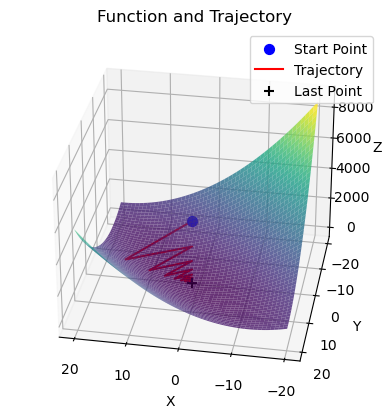

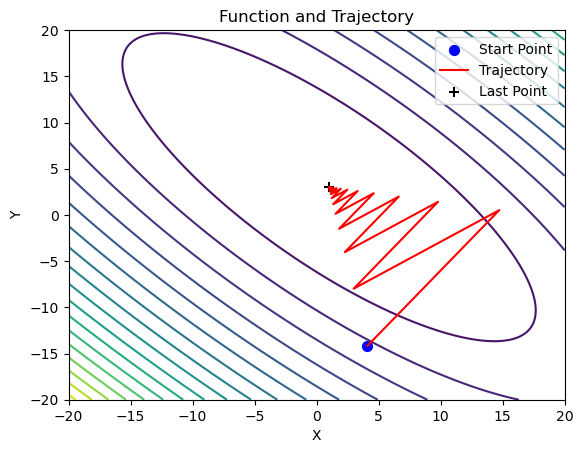

Найденный минимум:
X = 1.0000000000000002 Y = 2.999999999999999 Z = 4.43734259186819E-30


In [43]:
plot_function_and_trajectory_3D(history, custom_function.calculate_values, custom_function.bounds,custom_function.global_min() )
plot_function_and_trajectory_2D(history, custom_function.calculate_values, custom_function.bounds,custom_function.global_min() )

print(f"Найденный минимум:")
print(f"X = {history[len(history)-1, 0]} Y = {history[len(history)-1, 1]} Z = {history[len(history)-1, 2]}")

In [871]:
history = Momentum_GD(custom_function.evaluate, custom_function.evaluate_gradient, start_params, custom_function.global_min(), max_iter=10000, learningRate=0.1, momentum = 0.1)

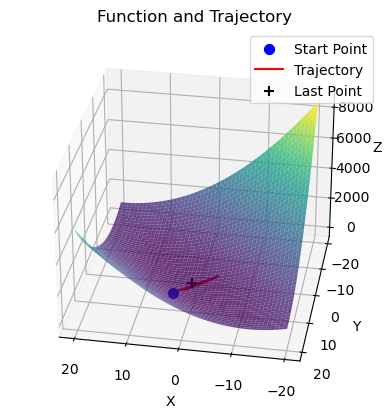

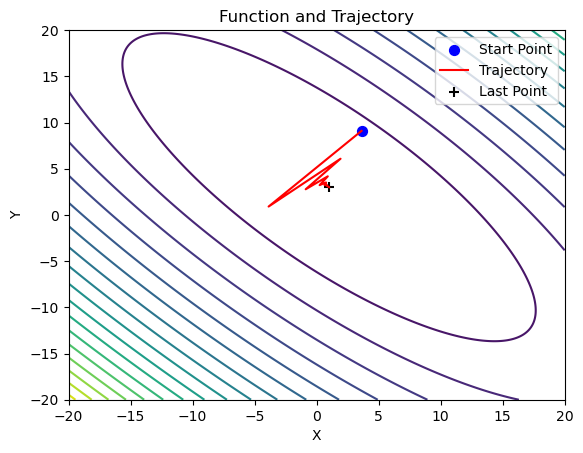

Найденный минимум:
X = 0.9999999999999996 Y = 3.000000000000001 Z = 1.77493703674728E-30


In [872]:
plot_function_and_trajectory_3D(history, custom_function.calculate_values, custom_function.bounds,custom_function.global_min() )
plot_function_and_trajectory_2D(history, custom_function.calculate_values, custom_function.bounds,custom_function.global_min() )
print(f"Найденный минимум:")
print(f"X = {history[len(history)-1, 0]} Y = {history[len(history)-1, 1]} Z = {history[len(history)-1, 2]}")

In [44]:
history = Adagrad_GD(custom_function.evaluate, custom_function.evaluate_gradient, start_params, custom_function.global_min(), max_iter=10000, learningRate=0.1)


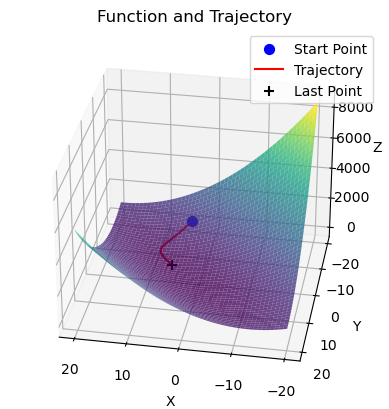

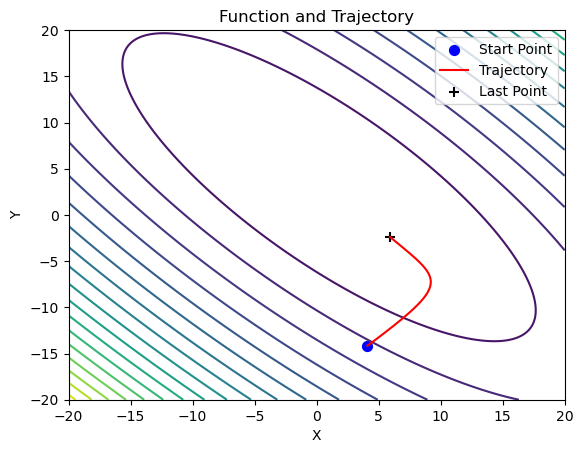

Найденный минимум:
X = 5.918739398620635 Y = -2.3917345313507723 Z = 54.1596961104488


In [45]:
plot_function_and_trajectory_3D(history, custom_function.calculate_values, custom_function.bounds,custom_function.global_min() )
plot_function_and_trajectory_2D(history, custom_function.calculate_values, custom_function.bounds,custom_function.global_min() )

print(f"Найденный минимум:")
print(f"X = {history[len(history)-1, 0]} Y = {history[len(history)-1, 1]} Z = {history[len(history)-1, 2]}")

In [48]:
history = ADAM_GD(custom_function.evaluate, custom_function.evaluate_gradient, start_params, custom_function.global_min(), max_iter=10000, learningRate=0.1)

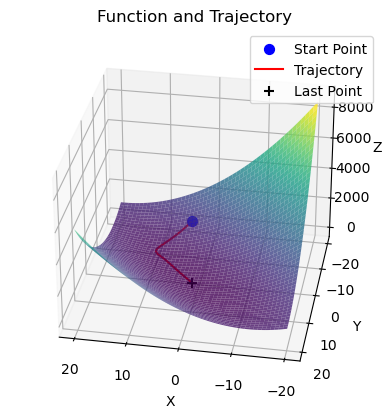

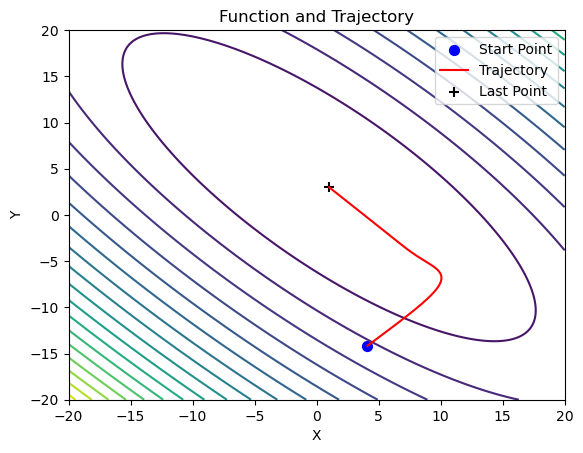

Найденный минимум:
X = 1.0000000000000002 Y = 3.0 Z = 0


In [49]:
plot_function_and_trajectory_3D(history, custom_function.calculate_values, custom_function.bounds,custom_function.global_min() )
plot_function_and_trajectory_2D(history, custom_function.calculate_values, custom_function.bounds,custom_function.global_min() )

print(f"Найденный минимум:")
print(f"X = {history[len(history)-1, 0]} Y = {history[len(history)-1, 1]} Z = {history[len(history)-1, 2]}")